In [36]:
# Standard Library
import argparse
import datetime
import json
import math
import os
import random

# Third Party Library
import networkx as nx
import pandas as pd
from tulip import tlp

# First Party Library
from drawing.fm3 import fm3
from drawing.fruchterman_reingold import fruchterman_reingold
from drawing.sgd import sgd
from quality_metrics import (
    angular_resolution,
    aspect_ratio,
    crossing_angle,
    crossing_number,
    gabriel_graph_property,
    ideal_edge_length,
    node_resolution,
    run_time,
    shape_based_metrics,
    stress,
)
from quality_metrics.run_time import RunTime
from utils.calc_quality_metrics import calc_qs
from utils.dataset import dataset_names
from utils.graph import (
    generate_egraph_graph,
    generate_tulip_graph,
    graph_preprocessing,
)

In [37]:
dataset_name = 'les_miserables'
EDGE_WEIGHT = 30

In [38]:
print(tulip)

<module 'tulip' from '/Users/fuga_takata/dev/vdslab-project/hyperparameter_optimization/.venv/lib/python3.9/site-packages/tulip/__init__.py'>


[168.5497589111328, 158.79246520996094]
[168.5497589111328, 158.79246520996094]
[168.5497589111328, 158.79246520996094]
[168.5497589111328, 158.79246520996094]


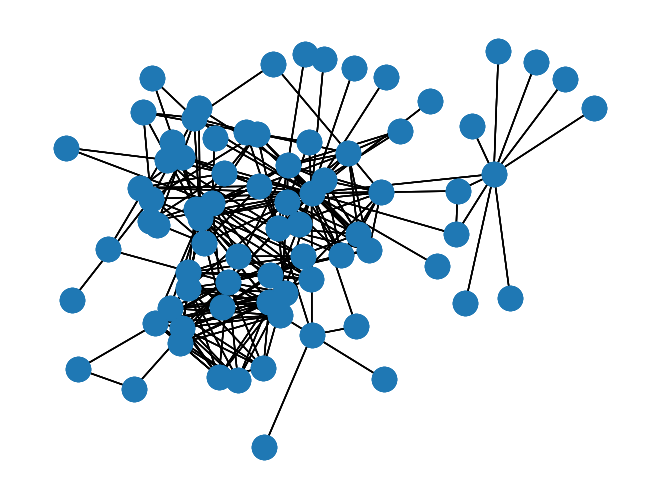

In [39]:
dataset_path = f"lib/egraph-rs/js/dataset/{dataset_name}.json"

with open(dataset_path) as f:
    graph_data = json.load(f)
nx_graph = graph_preprocessing(nx.node_link_graph(graph_data), EDGE_WEIGHT)
all_pairs_shortest_path_length = dict(
    nx.all_pairs_dijkstra_path_length(nx_graph)
)

for _ in range(4):
    tlp_layout_name = "FM^3 (OGDF)"

    tlp_graph = generate_tulip_graph(nx_graph)

    params = {
        "unit edge length": EDGE_WEIGHT,
        "new initial placement": True,
        "fixed iterations": random.randrange(1, 1000),
        "threshold": random.uniform(0.001, 1.0),
        "page format": "square",
        "quality vs speed": "beautiful and fast",
        "edge length measurement": "midpoint",
        "allowed positions": "all",
        "tip over": "no growing row",
        "presort": "decreasing height",
        # "galaxy choice": "non uniform lower mass",
        # "max iter change": "linearly decreasing",
        "initial placement": "advanced",
        "force model": "new",
        "repulsive force method": "nmm",
        "initial placement forces": "uniform grid",
        "reduced tree construction": "subtree by subtree",
        "smallest cell finding": "iteratively",
    }

    pos = fm3(tlp_graph, params)

    nx.draw(nx_graph, pos)
    # print(params)
    print(pos['Napoleon'])


In [40]:
params_df = pd.read_pickle(f'data/params/SS/USpowerGrid/opt.pkl')

In [41]:
params_df

,target,params
0,angular_resolution,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,aspect_ratio,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,crossing_angle,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,crossing_number,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,gabriel_graph_property,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,ideal_edge_length,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,node_resolution,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,run_time,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,shape_based_metrics,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,stress,"{'edge_length': 30, 'number_of_pivots_rate': 0..."


In [42]:
p = params_df[params_df['target'] == 'angular_resolution']
a = params_df.query('target == "angular_resolution"')
for i, v in a.iterrows():
    print(i,v.to_dict())

0 {'target': 'angular_resolution', 'params': {'edge_length': 30, 'number_of_pivots_rate': 0.9310046180600711, 'number_of_pivots': 4601, 'number_of_iterations': 87, 'eps': 0.048161440219843164}}


In [43]:
df = pd.read_pickle('data/params/SS/USpowerGrid/opt.pkl')

In [44]:
df

,target,params
0,angular_resolution,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,aspect_ratio,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,crossing_angle,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,crossing_number,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,gabriel_graph_property,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,ideal_edge_length,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,node_resolution,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,run_time,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,shape_based_metrics,"{'edge_length': 30, 'number_of_pivots_rate': 0..."
0,stress,"{'edge_length': 30, 'number_of_pivots_rate': 0..."


In [45]:
a = df[df['target'] == 'angular_resolution'].params
a[0]

{'edge_length': 30,
 'number_of_pivots_rate': 0.9310046180600711,
 'number_of_pivots': 4601,
 'number_of_iterations': 87,
 'eps': 0.048161440219843164}

In [73]:
import pandas as pd
from quality_metrics import (
    angular_resolution,
    aspect_ratio,
    crossing_angle,
    crossing_number,
    gabriel_graph_property,
    ideal_edge_length,
    node_resolution,
    run_time,
    shape_based_metrics,
    stress,
)


d = "USpowerGrid"
l = "SS"


QUALITY_METRICS = {
    "angular_resolution": angular_resolution,
    "aspect_ratio": aspect_ratio,
    "crossing_angle": crossing_angle,
    "crossing_number": crossing_number,
    "gabriel_graph_property": gabriel_graph_property,
    "ideal_edge_length": ideal_edge_length,
    "node_resolution": node_resolution,
    "run_time": run_time,
    "shape_based_metrics": shape_based_metrics,
    "stress": stress,
}

con = {
    "angular_resolution": "stress",
    "aspect_ratio": "angular_resolution",
    "crossing_angle": "aspect_ratio",
    "crossing_number": "crossing_angle",
    "gabriel_graph_property": "crossing_number",
    "ideal_edge_length": "gabriel_graph_property",
    "node_resolution": "ideal_edge_length",
    "run_time": "node_resolution",
    "shape_based_metrics": "run_time",
    "stress": "shape_based_metrics",
}

ALL_QUALITY_METRICS_NAMES = sorted([name for name in QUALITY_METRICS])

opfs_dfs = {}
for name in ALL_QUALITY_METRICS_NAMES:
    opfs_dfs[name] = pd.read_pickle(f"data/n_opfs/{l}/{d}/{name}.pkl")

In [47]:
ad = []
for name in ALL_QUALITY_METRICS_NAMES:
    tdf = opfs_dfs[name]
    for i, data in tdf.iterrows():
        dc = data.to_dict()
        dc['target'] = con[dc['target']]
        ad.append(dc)

new_df = pd.DataFrame(ad)

In [48]:
for name in ALL_QUALITY_METRICS_NAMES:
    tdf = opfs_dfs[name]
    ds = []
    for i, data in tdf.iterrows():
        dc = data.to_dict()
        dc["target"] = con[dc["target"]]
        ds.append(dc)
    pd.to_pickle(pd.DataFrame(ds), f"data/nn_opfs/{l}/{d}/{con[name]}.pkl")

OSError: Cannot save file into a non-existent directory: 'data/nn_opfs/SS/USpowerGrid'

In [50]:
import optuna

for t in ALL_QUALITY_METRICS_NAMES:
    study = optuna.load_study(
        study_name=f"{t}",
        storage=f"sqlite:///db/opt/FR/USpowerGrid/{t}.db",
    )
    print(t, len(study.trials))

angular_resolution 100
aspect_ratio 88
crossing_angle 74
crossing_number 74
gabriel_graph_property 74
ideal_edge_length 74
node_resolution 74
run_time 74
shape_based_metrics 74
stress 74


In [ ]:
len(study.trials)

In [ ]:
import pandas as pd

df = pd.read_pickle('data/n_rpfs/FR/les_miserables/2023-01-10_19-27-50.pkl')

for v in df['params'].values:
    v['pos'] = None
    print(v)

In [ ]:
import pandas as pd

df = pd.read_pickle(
'/Users/fuga_takata/dev/vdslab-project/hyperparameter_optimization/data/n_opfs/FR/USpowerGrid/run_time.pkl'
)


# for i, v in df.iterrows():
#     print(v.quality_metrics)
#     if i > 2:
#         break


# -0.24272527226327514


In [ ]:
ndf = pd.read_pickle('/Users/fuga_takata/dev/vdslab-project/hyperparameter_optimization/data/params/FR/USpowerGrid/opt.pkl')
ndf[ndf['target'] == 'run_time'].params[0]['pos'] = None
ndf[ndf['target'] == 'run_time'].params[0]

In [ ]:
p = study.best_trial.user_attrs['params']
p['pos'] = None
p

{'angular_resolution': 3.548750619247731e-05, 'aspect_ratio': 0.9328097551639816, 'crossing_angle': 0.9973304121687546, 'crossing_number': 86706, 'gabriel_graph_property': 0.004381591875416539, 'ideal_edge_length': 6550.503576998862, 'node_resolution': 8.547265260020177e-05, 'shape_based_metrics': 0.01811585587223256, 'stress': 6086056.430406933, 'run_time': 72.31541740299872}


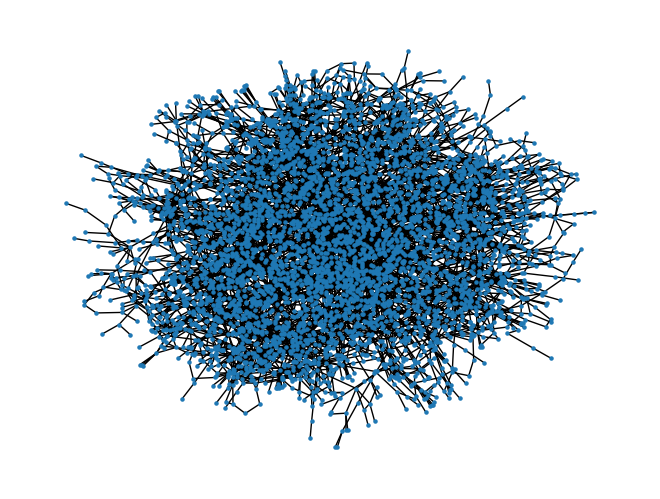

In [112]:
import pandas as pd
import networkx as nx
from utils.graph import graph_preprocessing
import json
from quality_metrics.run_time import RunTime
from utils.calc_quality_metrics import calc_qs

# df = pd.read_pickle(
#     "/Users/fuga_takata/dev/vdslab-project/hyperparameter_optimization/data/n_opfs/FR/USpowerGrid/all.pkl"
# )
# df = df[df["target"] == "ideal_edge_length"]


with open(
    "/Users/fuga_takata/dev/vdslab-project/hyperparameter_optimization/lib/egraph-rs/js/dataset/USpowerGrid.json"
) as f:
    graph_data = json.load(f)
nx_graph = graph_preprocessing(nx.node_link_graph(graph_data), edge_weight=30)
all_pairs_shortest_path_length = dict(
    nx.all_pairs_dijkstra_path_length(nx_graph)
)
# for i in nx_graph.edges(data=True):
#     print(i)
#     break
run_time = RunTime()
run_time.start()
pos = nx.spring_layout(nx_graph, k=0.1)
run_time.end()

quality_metrics = calc_qs(
    nx_graph=nx_graph,
    pos=pos,
    all_pairs_shortest_path_length=all_pairs_shortest_path_length,
    target_quality_metrics_names=ALL_QUALITY_METRICS_NAMES,
    edge_weight=30,
)
quality_metrics = {**quality_metrics, "run_time": run_time.quality()}

print(quality_metrics)

nx.draw(nx_graph, pos=pos, node_size=5)
# for i, v in df.iterrows():
#     di = v.to_dict()
#     pos = di['pos']
#     nx.draw(nx_graph, pos=pos, node_size=5, edge_color='lightblue')
#     break


In [118]:
quality_metrics

{'angular_resolution': 3.548750619247731e-05,
 'aspect_ratio': 0.9328097551639816,
 'crossing_angle': 0.9973304121687546,
 'crossing_number': 86706,
 'gabriel_graph_property': 0.004381591875416539,
 'ideal_edge_length': 6550.503576998862,
 'node_resolution': 8.547265260020177e-05,
 'shape_based_metrics': 0.01811585587223256,
 'stress': 6086056.430406933,
 'run_time': 72.31541740299872}

In [119]:
df = pd.read_pickle(
    "/Users/fuga_takata/dev/vdslab-project/hyperparameter_optimization/data/n_opfs/FR/USpowerGrid/all.pkl"
)
for t in ALL_QUALITY_METRICS_NAMES:
    for i, v in df[df['target'] == t].iterrows():
        di = v.to_dict()
        print(t, di['quality_metrics'][t])
        break

angular_resolution 0.0012747133914784417
aspect_ratio 0.9993548031791442
crossing_angle 0.9991898867217129
crossing_number 5195074
gabriel_graph_property 0.0015220227723535414
ideal_edge_length 6059.265076613371
node_resolution 0.1866397632530073
run_time 3.322896158322692
shape_based_metrics 0.0005298109882202172
stress 6069977.779240098


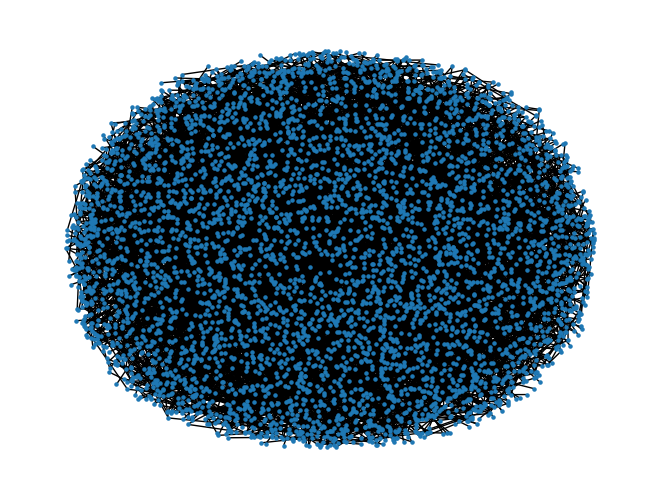

In [116]:
import pandas as pd
import networkx as nx
from utils.graph import graph_preprocessing
import json
from quality_metrics.run_time import RunTime
from utils.calc_quality_metrics import calc_qs



with open(
    "/Users/fuga_takata/dev/vdslab-project/hyperparameter_optimization/lib/egraph-rs/js/dataset/USpowerGrid.json"
) as f:
    graph_data = json.load(f)
nx_graph = graph_preprocessing(nx.node_link_graph(graph_data), edge_weight=30)

pos = nx.spring_layout(nx_graph, k=0.5)

nx.draw(nx_graph, pos=pos, node_size=5)
# for i, v in df.iterrows():
#     di = v.to_dict()
#     pos = di['pos']
#     nx.draw(nx_graph, pos=pos, node_size=5, edge_color='lightblue')
#     break